<a href="https://colab.research.google.com/github/ChaelinL/DataAnalysis_Study/blob/main/%EC%9D%B4%EC%B1%84%EB%A6%B007_0521_%EA%B3%BC%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 데이터분석 기초반 8주차 과제2
- crime 데이터를 가지고 시계열 데이터 분석을 진행해 주세요.
- 제공된 컬럼을 가지고 범죄건과 비교해서 분석을 진행해 주세요.
- ex) OFFENSE_TYPE_ID 해당 컬럼과 범죄건수와 시계열적인 패턴까지 다 엮어서 어떤식으로 되는지 비교분석이 가능하다.

In [1]:
import pandas as pd

# crime 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

crime = pd.read_csv('/content/drive/My Drive/crime.csv')
crime

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...,...
460906,460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


In [2]:
crime.info()  # 데이터 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


**1. 데이터 전처리**

In [3]:
# 시계열 데이터로 변경
crime['REPORTED_DATE'] = pd.to_datetime(crime['REPORTED_DATE'])
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           460911 non-null  int64         
 1   OFFENSE_TYPE_ID      460911 non-null  object        
 2   OFFENSE_CATEGORY_ID  460911 non-null  object        
 3   REPORTED_DATE        460911 non-null  datetime64[ns]
 4   GEO_LON              457296 non-null  float64       
 5   GEO_LAT              457296 non-null  float64       
 6   NEIGHBORHOOD_ID      460911 non-null  object        
 7   IS_CRIME             460911 non-null  int64         
 8   IS_TRAFFIC           460911 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 31.6+ MB


In [4]:
crime_dt = crime.set_index('REPORTED_DATE')  # 시계열 컬럼을 인덱스로 지정
crime_dt = crime_dt.sort_index()
crime_dt = crime_dt.drop('Unnamed: 0', axis=1)  # 불필요한 열 제거

crime_dt

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2017-09-29 03:58:00,traf-other,all-other-crimes,-104.994817,39.768043,globeville,1,0
2017-09-29 03:58:00,burglary-business-by-force,burglary,-104.987803,39.681199,overland,1,0
2017-09-29 04:12:00,traf-other,all-other-crimes,-105.006426,39.783139,sunnyside,1,0


**2. 데이터 시각화**

**2-1. 연도별 월별 범죄건수와 교통사고수 비교**

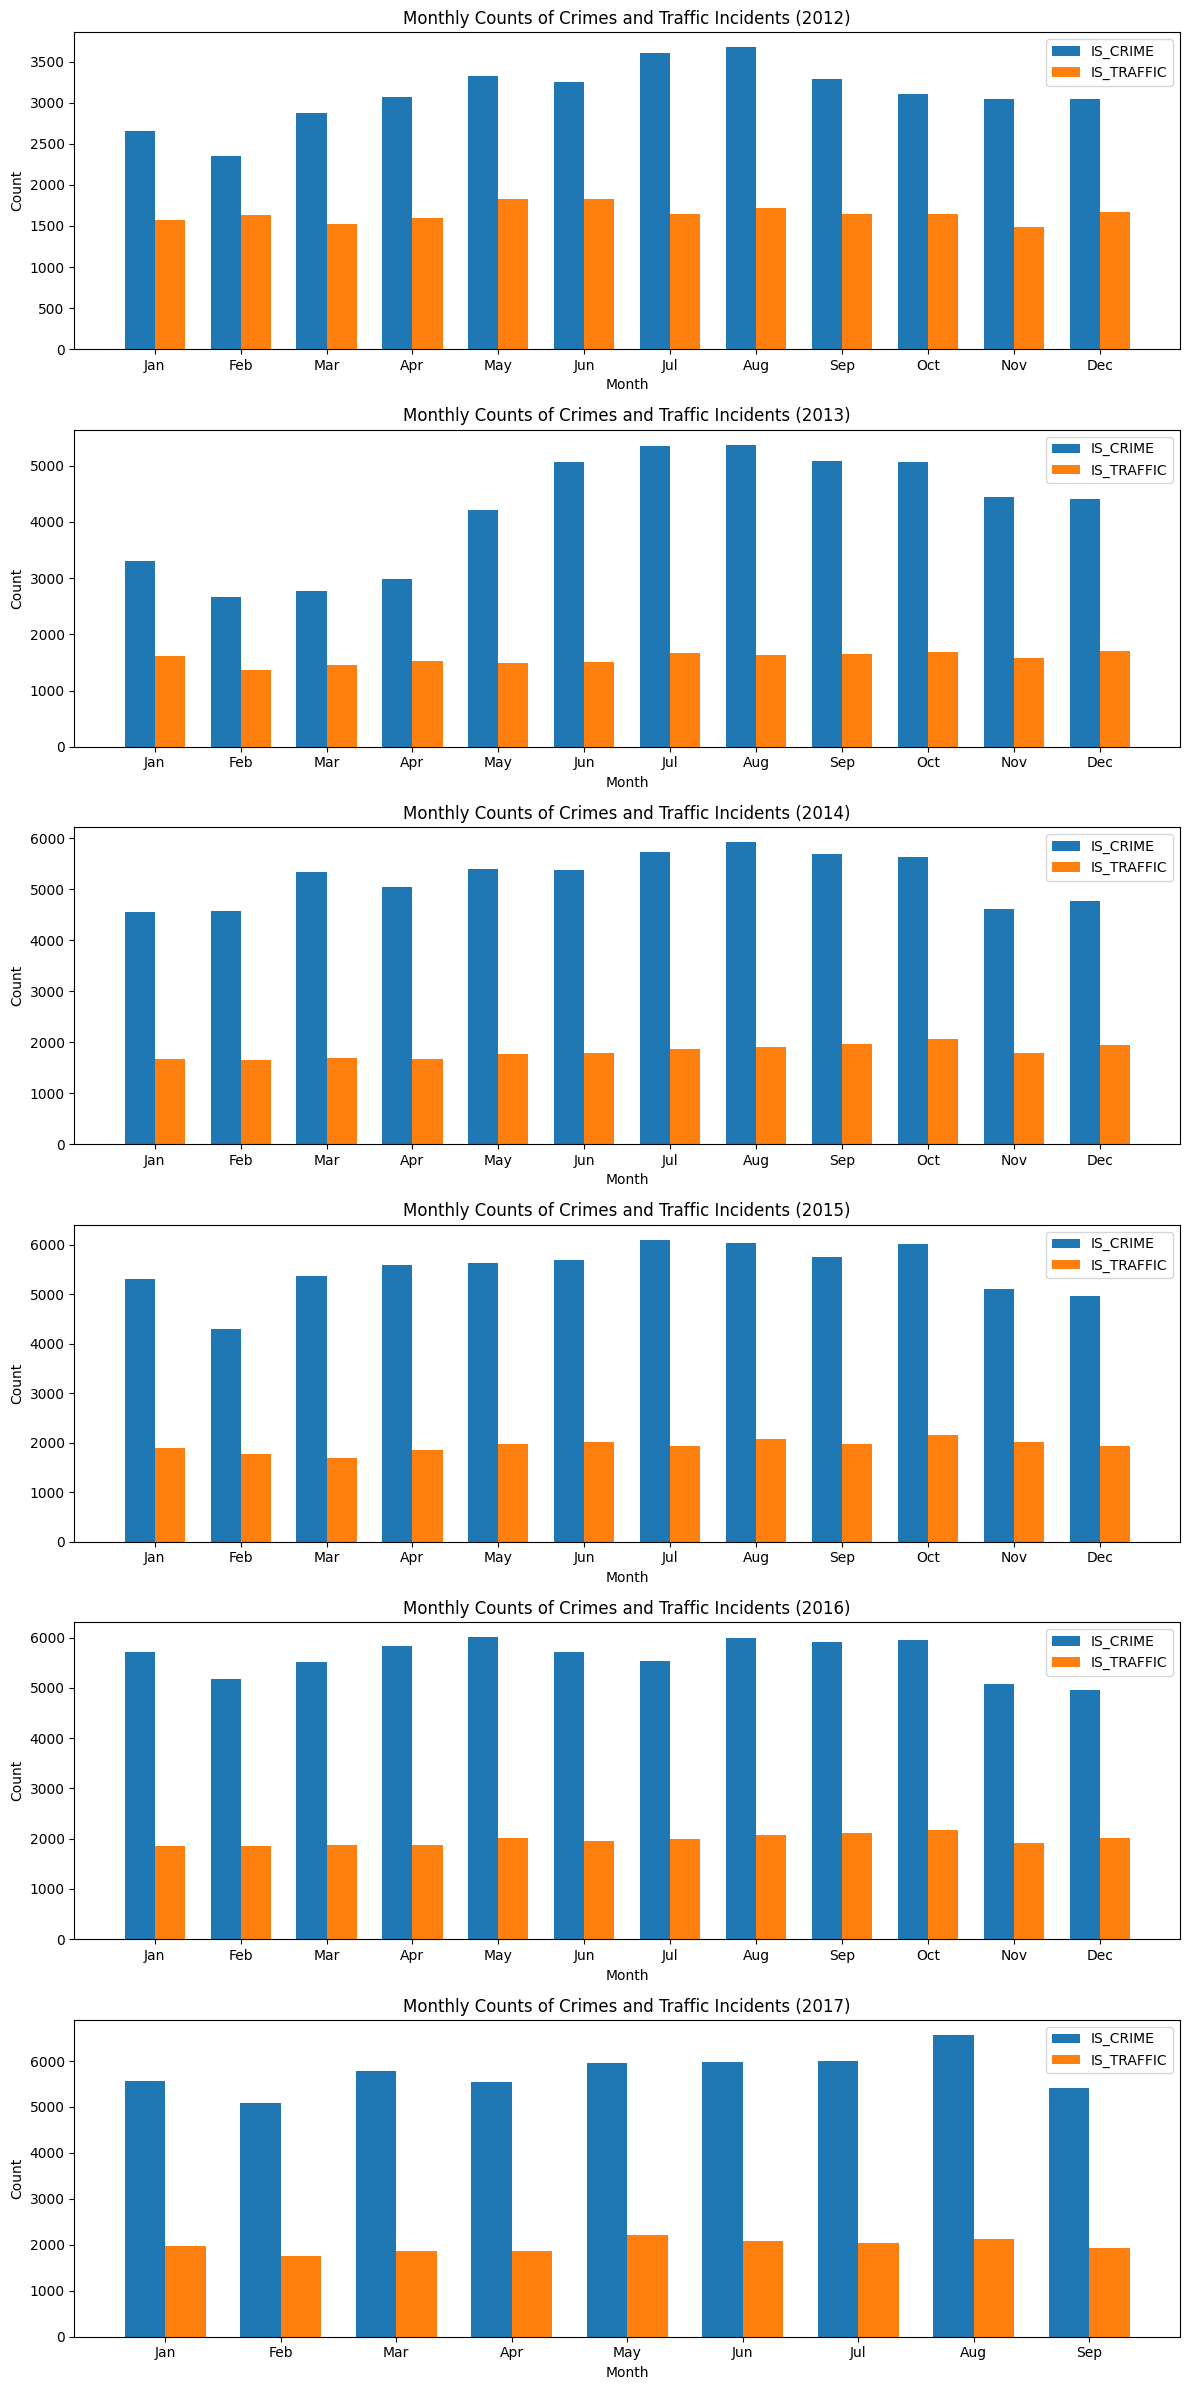

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 그래프 설정
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 24))

# 반복문을 사용하여 2012년부터 2017년까지의 그래프 그리기
for i, year in enumerate(range(2012, 2018)):
    # 해당 연도의 데이터 선택
    crime_dt_year = crime_dt.loc[str(year)]
    mcount_year = crime_dt_year[['IS_CRIME', 'IS_TRAFFIC']].resample('M').sum()

    # 월별 합계 그래프 그리기
    bar_width = 0.35
    x = np.arange(len(mcount_year))
    axes[i].bar(x, mcount_year['IS_CRIME'], width=bar_width, label='IS_CRIME')
    axes[i].bar(x + bar_width, mcount_year['IS_TRAFFIC'], width=bar_width, label='IS_TRAFFIC')

    # 그래프 타이틀과 축 레이블 설정
    axes[i].set_title('Monthly Counts of Crimes and Traffic Incidents ({})'.format(year))
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Count')

    # x축 눈금 설정
    axes[i].set_xticks(x + bar_width / 2)
    axes[i].set_xticklabels(mcount_year.index.strftime('%b'))

    # 범례 추가
    axes[i].legend()

# 그래프 출력
plt.tight_layout()
plt.show()


=> 모든 연도에서 범죄수가 교통사고수보다 압도적으로 많다는 것을 확인할 수 있다. 따라서, 구체적으로 각 연도별로 어떤 범죄가 많이 일어나는지 확인해보고자 한다.

**2-2. 연도별 범죄유형별 범죄건수**

<ipython-input-8-5468c8b770af>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_dt_year['OFFENSE_CATEGORY'] = crime_dt_year['OFFENSE_TYPE_ID'].str.split('-').str[0]
<ipython-input-8-5468c8b770af>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_dt_year['OFFENSE_CATEGORY'] = crime_dt_year['OFFENSE_TYPE_ID'].str.split('-').str[0]
<ipython-input-8-5468c8b770af>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

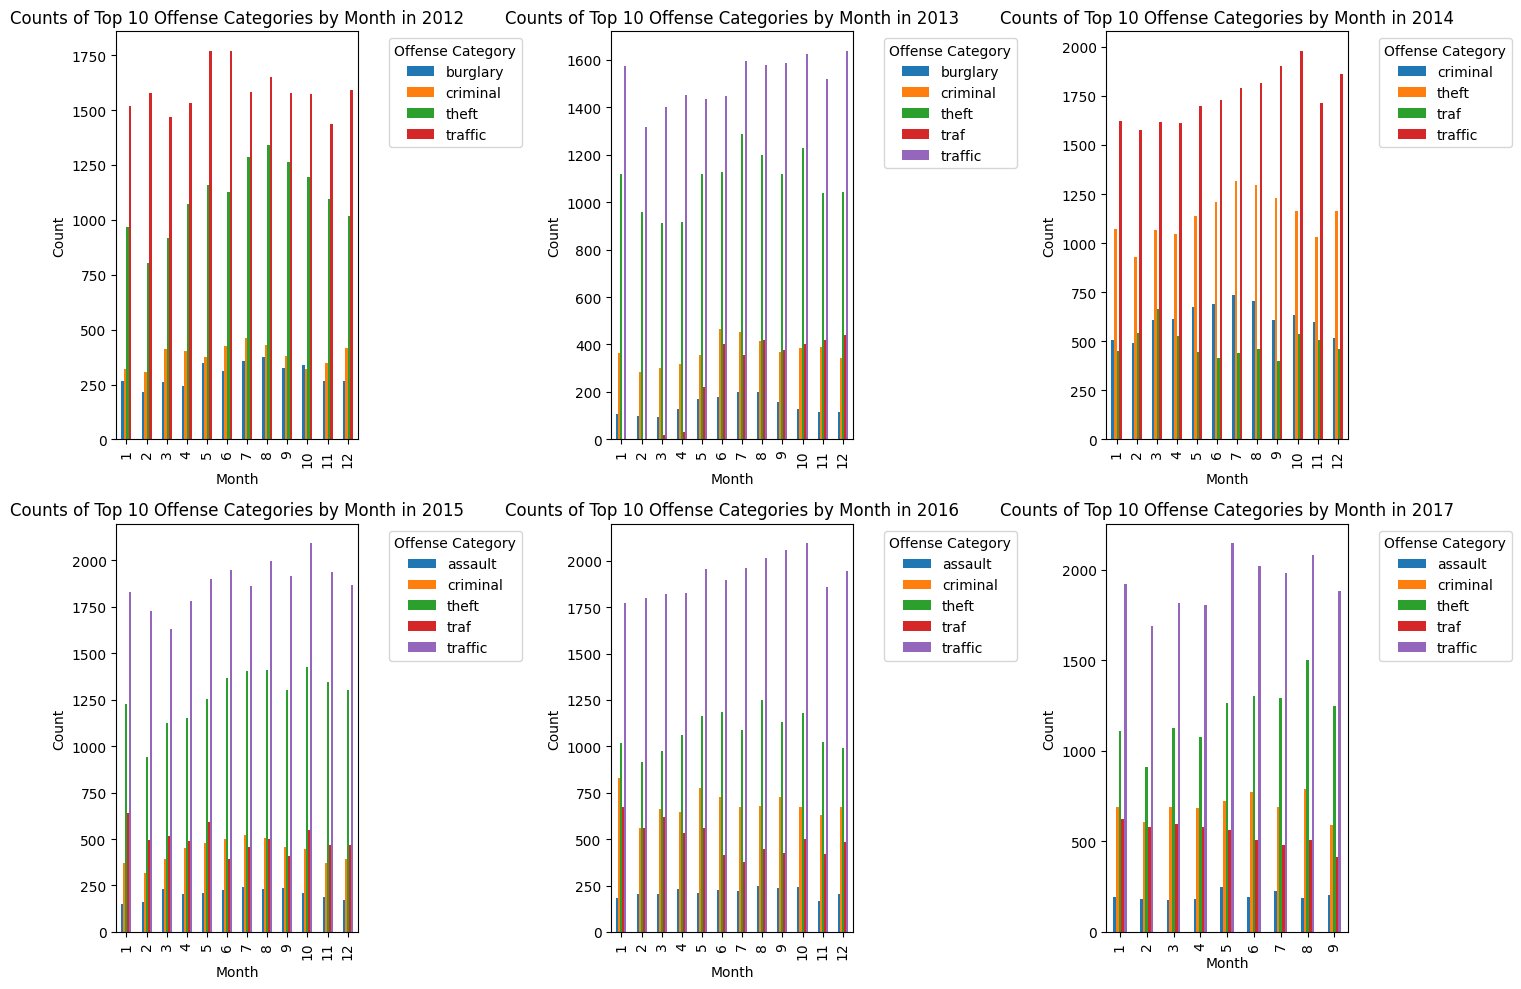

In [8]:
# 2012년부터 2017년까지 반복문으로 그래프 생성
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2행 3열의 subplot 생성
axs = axs.flatten()  # axs를 1차원 배열로 변환

for i, year in enumerate(range(2012, 2018)):
    # 해당 연도의 데이터 선택
    crime_dt_year = crime_dt.loc[str(year)]

    # OFFENSE_TYPE_ID 열에서 첫 번째 단어 추출하여 새로운 열 생성
    crime_dt_year['OFFENSE_CATEGORY'] = crime_dt_year['OFFENSE_TYPE_ID'].str.split('-').str[0]

    # 발생 건수가 가장 많은 5개의 OFFENSE_TYPE_ID 추출
    top_offense_ids = crime_dt_year['OFFENSE_TYPE_ID'].value_counts().nlargest(10).index

    # 해당 ID를 가진 데이터 필터링
    filtered_data = crime_dt_year[crime_dt_year['OFFENSE_TYPE_ID'].isin(top_offense_ids)]

    # 월별로 그룹화하여 개수 계산
    count_by_month = filtered_data.groupby([filtered_data.index.month, 'OFFENSE_CATEGORY']).size()

    # 막대 그래프 그리기
    count_by_month.unstack().plot(kind='bar', ax=axs[i])  # axs[i]에 그래프 그리기

    # 그래프 타이틀과 축 레이블 설정
    axs[i].set_title(f'Counts of Top 10 Offense Categories by Month in {year}')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Count')

    # 범례 추가
    axs[i].legend(title='Offense Category', bbox_to_anchor=(1.1, 1))

# 그래프 출력
plt.tight_layout()
plt.show()


=> 모든 연도 다 교통 관련 범죄건수가 가장 높게 나타났으며, 절도가 그 다음으로 높게 나타남을 알 수 있다.

**2-3. 시간대별 범죄건수 추이**

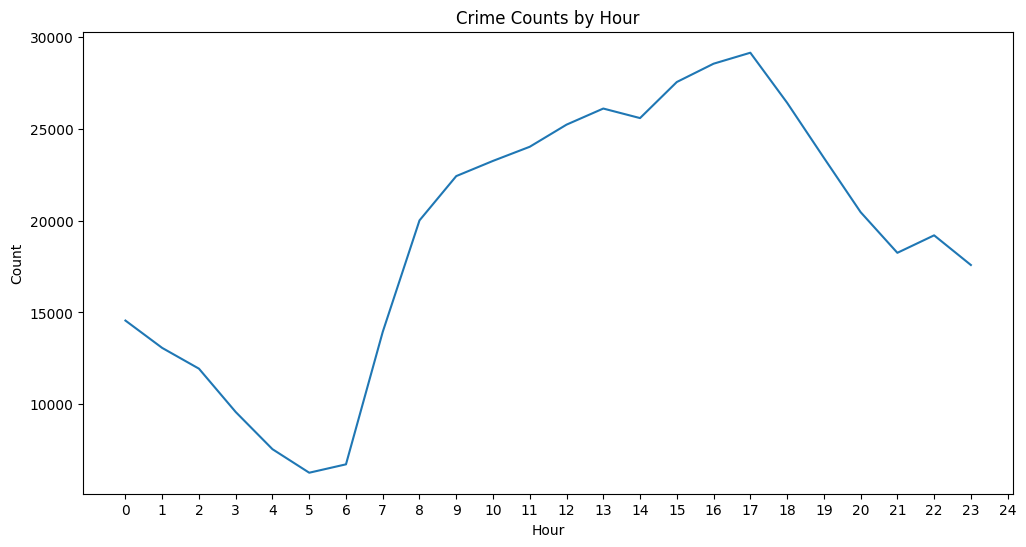

In [13]:
# 시간대별로 그룹화하여 개수 계산
count_by_hour = crime_dt.groupby(crime_dt.index.hour).size()

# 그래프 설정
plt.figure(figsize=(12, 6))

# 선 그래프 그리기
count_by_hour.plot(kind='line')

# 그래프 타이틀과 축 레이블 설정
plt.title('Crime Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')

# x축 눈금 설정
plt.xticks(range(0, 25, 1))

# 그래프 출력
plt.show()


=> 출근시간대인 8시부터 급격하게 범죄건수가 올라가며, 주로 이동량이 제일 많을 시간대인 17시에 가장 많은 범죄건수가 나타나는 것을 보아, 교통량이 많은 출퇴근 시간대에 교통 관련 범죄가 많이 일어났음을 추측할 수 있다.

=> 또한, 출근시간대인 8시부터 퇴근시간대인 17시까지 급격하게 범죄건수가 올라가는 것을 보아 집이 비어있는 시간에 절도 관련 범죄가 많이 일어났음을 추측할 수 있다.

=> 결과적으로 사람과 차의 이동량이 몰리는 출퇴근 시간대에 운전자와 보행자 모두 주의해야 하며, 출근이나 등교를 위해 집에서 나와 외출하기 전 집 단속을 철저히 해두는 것이 범죄를 예방하기 위한 방법이라고 볼 수 있다.